In [1]:
import re
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import math

# Create dataframe that matches paper abstract with subjects

In [2]:
paper_id = []
abstract = []

f = open('aminer_2014.txt','r',encoding = 'utf8')
f.readline()
for i, line in enumerate(f):
        if (i+2) % 250000 == 0:
            print('file '+file+': ',round((i+2)/1000000*100,1),"%")
        json_line = json.loads(line)
        if 'year' in json_line and 'keywords' in json_line and \
        'abstract' in json_line and 'lang' in json_line and \
        'references' in json_line and 'issn' in json_line:
            
            if json_line['lang'] == 'en' :
                
                ## store paper info, later use to get the subject of the paper
                paper_id.append(json_line['id'])
                abstract.append(json_line['abstract'])

                
f.close()

In [3]:
df= pd.DataFrame()
df['id'] = paper_id
df['abstract'] = abstract
df.set_index('id')

,abstract
id,
53e997a2b7602d9701f74cf7,The nursing care of a patient following subara...
53e997a6b7602d9701f7c67f,The authors wish to thank G. W. Beakley and F....
53e997aab7602d9701f827a4,\n Almost all problems known to theoretical ec...
53e997aeb7602d9701f8af9c,Pain management in emergency departments (EDs)...
53e997b5b7602d9701f97a9d,Provides an abstract for each of the two keyno...
53e997bab7602d9701fa1ddc,Howard drifted back into consciousness. For a ...
53e997bab7602d9701fa3207,"Last week, Nature painted a pessimistic pictur..."
53e997c6b7602d9701fb6228,In the first article in the series on risk man...
53e997c6b7602d9701fb7afb,This introduction to the special section on Re...


In [4]:
df.head()

,id,abstract
0,53e997a2b7602d9701f74cf7,The nursing care of a patient following subara...
1,53e997a6b7602d9701f7c67f,The authors wish to thank G. W. Beakley and F....
2,53e997aab7602d9701f827a4,\n Almost all problems known to theoretical ec...
3,53e997aeb7602d9701f8af9c,Pain management in emergency departments (EDs)...
4,53e997b5b7602d9701f97a9d,Provides an abstract for each of the two keyno...


In [5]:
subject = pd.read_csv('paper_subject_match.csv',index_col = 'id')

In [6]:
subject.head()

,paper_subject
id,
53e99784b7602d9701f3e13e,13.0
53e99784b7602d9701f3e4f2,13.0
53e9978db7602d9701f4f415,13.0
53e99792b7602d9701f56a86,27.0
53e99792b7602d9701f5b087,NaN


In [7]:
tm = pd.merge(df, subject, on = ['id'])

In [8]:
tm.isnull().sum()

id                   0
abstract             0
paper_subject    12413
dtype: int64

In [9]:
len(tm)

234253

In [10]:
tm = tm.dropna()

In [11]:
tm = tm.drop(columns = ['id'])

In [12]:
tm['paper_subject'] = tm['paper_subject'].apply(np.int64)

In [13]:
len(tm.paper_subject.unique())

27

In [14]:
tm.head()

,abstract,paper_subject
2,\n Almost all problems known to theoretical ec...,33
3,Pain management in emergency departments (EDs)...,29
4,Provides an abstract for each of the two keyno...,27
5,Howard drifted back into consciousness. For a ...,31
6,"Last week, Nature painted a pessimistic pictur...",10


# Build Topic models for each subject

In [15]:
bysub = list()
for x in range(10,37):
    bysub.append(tm[tm['paper_subject'] == x])

**Processing the abstract:**
- Tokenization: Split the text into sentences and the sentences into words. Lowercase the words and remove punctuation
- Words that have fewer than 3 characters are removed
- All stopwords are removed
- lemmatized — words in third person to first person, verbs in past and future tenses to present
- Stemmed — words are reduced to their root form

In [16]:
#import sys
#!{sys.executable} -m pip install gensim
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2015)

In [17]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/yihuan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [18]:
def lemmatize_stemming(text):
    return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v')) #lemmatize as verb, default is noun

def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(lemmatize_stemming(token))
    return result

In [19]:
#example of processed document
stemmer = SnowballStemmer('english') #Create a new instance of a language specific subclass
doc_sample = bysub[1].values[0][0]
words = []
for word in doc_sample.split(' '):
    words.append(word)
print(words[:50])
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample[:300]))


['One', 'of', 'the', 'most', 'important', 'challenges', 'in', 'network', 'science', 'is', 'to', 'quantify', 'the', 'information', 'encoded', 'in', 'complex', 'network', 'structures.', 'Disentangling', 'randomness', 'from', 'organizational', 'principles', 'is', 'even', 'more', 'demanding', 'when', 'networks', 'have', 'a', 'multiplex', 'nature.', 'Multiplex', 'networks', 'are', 'multilayer', 'systems', 'of', '[Formula:', 'see', 'text]', 'nodes', 'that', 'can', 'be', 'linked', 'in', 'multiple']


 tokenized and lemmatized document: 
['import', 'challeng', 'network', 'scienc', 'quantifi', 'inform', 'encod', 'complex', 'network', 'structur', 'disentangl', 'random', 'organiz', 'principl', 'demand', 'network', 'multiplex', 'natur', 'multiplex', 'network', 'multilay', 'system', 'formula']


In [20]:
processed_docs = list()
for i in range(len(bysub)):
    processed_docs.append(bysub[i]['abstract'].map(preprocess))

In [21]:
processed_docs[2].values[0] #words processed in first abstract of Arts and Humanities

['letter',
 'examin',
 'problem',
 'robust',
 'subspac',
 'discoveri',
 'input',
 'data',
 'sampl',
 'instanc',
 'presenc',
 'overwhelm',
 'outlier',
 'corrupt',
 'typic',
 'exampl',
 'case',
 'give',
 'imag',
 'imag',
 'contain',
 'exampl',
 'face',
 'unknown',
 'locat',
 'unknown',
 'size',
 'goal',
 'identifi',
 'detect',
 'face',
 'imag',
 'simultan',
 'learn',
 'model',
 'employ',
 'simpl',
 'generat',
 'subspac',
 'model',
 'propos',
 'formul',
 'simultan',
 'infer',
 'label',
 'inform',
 'learn',
 'model',
 'rank',
 'optim',
 'solv',
 'problem',
 'enabl',
 'simultan',
 'identifi',
 'ownership',
 'instanc',
 'subspac',
 'learn',
 'correspond',
 'subspac',
 'model',
 'effici',
 'effect',
 'algorithm',
 'base',
 'altern',
 'direct',
 'method',
 'multipli',
 'provid',
 'extens',
 'simul',
 'experi',
 'verifi',
 'effect',
 'method',
 'propos',
 'scheme',
 'tackl',
 'relat',
 'high',
 'dimension',
 'combinatori',
 'select',
 'problem']

In [22]:
#function for Running LDA using TF-IDF
#i is subject index, text_str is sentence/abstract
from gensim import corpora, models
def LDA_TF_sub(i,text_str = ""):
    dictionary_i = gensim.corpora.Dictionary(processed_docs[i]) 
    bow_corpus_i = [dictionary_i.doc2bow(doc) for doc in processed_docs[i]]
    tfidf_i = models.TfidfModel(bow_corpus_i)
    corpus_tfidf_i = tfidf_i[bow_corpus_i]
    lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf_i, num_topics=10, id2word=dictionary_i, passes=2, workers=4)
    if len(text_str) != 0:
        bow_vector = dictionary_i.doc2bow(preprocess(text_str))
        for index, score in sorted(lda_model_tfidf[bow_vector], key=lambda tup: -1*tup[1]):
            print("\nScore: {}\n Topic: {}".format(score, lda_model_tfidf.print_topic(index, 5)))
    return(lda_model_tfidf)


In [23]:
#sample models in Arts and Humanities:
for idx, topic in LDA_TF_sub(2).print_topics(-1):
        print('Topic: {} Word: {}'.format(idx, topic))
        
    

Topic: 0 Word: 0.003*"memori" + 0.002*"speech" + 0.002*"listen" + 0.002*"children" + 0.002*"hear" + 0.002*"test" + 0.002*"depress" + 0.002*"languag" + 0.001*"particip" + 0.001*"experi"
Topic: 1 Word: 0.002*"fertil" + 0.002*"memori" + 0.002*"recal" + 0.002*"women" + 0.001*"item" + 0.001*"forget" + 0.001*"task" + 0.001*"religi" + 0.001*"prefer" + 0.001*"right"
Topic: 2 Word: 0.004*"hear" + 0.002*"self" + 0.002*"motor" + 0.002*"hand" + 0.002*"patient" + 0.002*"semant" + 0.002*"children" + 0.001*"whale" + 0.001*"factor" + 0.001*"mutat"
Topic: 3 Word: 0.002*"sexual" + 0.002*"surviv" + 0.002*"languag" + 0.002*"speech" + 0.001*"suicid" + 0.001*"emot" + 0.001*"children" + 0.001*"student" + 0.001*"relat" + 0.001*"memori"
Topic: 4 Word: 0.002*"memori" + 0.002*"function" + 0.002*"search" + 0.001*"visual" + 0.001*"news" + 0.001*"placebo" + 0.001*"cognit" + 0.001*"attent" + 0.001*"support" + 0.001*"mortal"
Topic: 5 Word: 0.002*"patient" + 0.002*"risk" + 0.001*"organ" + 0.001*"model" + 0.001*"indivi

In [24]:
# sample article in art and see how good is the result
sub2abs = np.array2string(bysub[2].values[595])
LDA_TF_sub(2,text_str = sub2abs)


Score: 0.9841501116752625
 Topic: 0.002*"surviv" + 0.002*"memori" + 0.002*"hear" + 0.001*"creativ" + 0.001*"threshold"


In [25]:
np.array2string(bysub[2].values[595])

'["Harold Cohen is a renowned painter who has developed a computer program, AARON, to create art. While AARON has been hailed as one of the most creative AI programs, Cohen consistently rejects the claims of machine creativity. Questioning the possibility for AI to model human creativity, Cohen suggests in so many words that the human mind takes a different route to creativity, a route that privileges the relational, rather than the computational, dimension of cognition. This unique perspective on the tangled web of mind, machine, and creativity is explored by an application of three relational models of the mind to an analysis of Cohen\'s talks and writings, which are available on his website: www.aaronshome.com."\n 12]'

sample 100 papers in arts and feed into each model

In [26]:
dictionary = []
for i in range(len(processed_docs)):
    dictionary.append(gensim.corpora.Dictionary(processed_docs[i]))


In [27]:
dictionary[0]

In [28]:
from gensim import corpora, models
def LDA_TF_sub_models(i,text_str = ""):
    dictionary[i] = gensim.corpora.Dictionary(processed_docs[i]) 
    bow_corpus_i = [dictionary[i].doc2bow(doc) for doc in processed_docs[i]]
    tfidf_i = models.TfidfModel(bow_corpus_i)
    corpus_tfidf_i = tfidf_i[bow_corpus_i]
    lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf_i, num_topics=10, id2word=dictionary[i], passes=2, workers=4)
    return(lda_model_tfidf)


In [29]:
LDA_TF_sub_models(2)

In [30]:
allmodels = []
for i in range(27):
    allmodels.append(LDA_TF_sub_models(i))

In [31]:
for idx, topic in allmodels[2].print_topics(-1):
        print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.002*"bodi" + 0.002*"task" + 0.002*"patient" + 0.002*"mind" + 0.002*"speech" + 0.002*"nurs" + 0.001*"stress" + 0.001*"visual" + 0.001*"chang" + 0.001*"sexual"
Topic: 1 Word: 0.002*"children" + 0.002*"memori" + 0.002*"intervent" + 0.002*"hear" + 0.002*"risk" + 0.001*"enhanc" + 0.001*"task" + 0.001*"review" + 0.001*"effect" + 0.001*"inform"
Topic: 2 Word: 0.002*"adhd" + 0.002*"decis" + 0.002*"memori" + 0.002*"recal" + 0.001*"patient" + 0.001*"process" + 0.001*"incapacit" + 0.001*"self" + 0.001*"particip" + 0.001*"treatment"
Topic: 3 Word: 0.002*"sexual" + 0.002*"cue" + 0.002*"test" + 0.001*"behaviour" + 0.001*"patient" + 0.001*"memori" + 0.001*"word" + 0.001*"perform" + 0.001*"religi" + 0.001*"posit"
Topic: 4 Word: 0.003*"speech" + 0.003*"hear" + 0.002*"children" + 0.002*"listen" + 0.002*"sound" + 0.002*"pattern" + 0.002*"surviv" + 0.002*"onset" + 0.002*"intellig" + 0.001*"process"
Topic: 5 Word: 0.003*"memori" + 0.002*"recognit" + 0.002*"patient" + 0.002*"semant" + 0.002

In [32]:
def feed_models(i, text_str):
        bow_vector = dictionary[i].doc2bow(preprocess(text_str))
        score = sorted(allmodels[i][bow_vector], key=lambda tup: -1*tup[1])[0]
        return score

In [33]:
feed_models(2,sub2abs)[1] #the score of sample article in art, for the art model

0.98414636

In [34]:
feed_models(8,sub2abs)[1] #the score of sample article in art, for the computer science model

0.3185783

In [62]:
sample = bysub[2]['abstract'].sample(n=200, random_state=1) #sample of 200 subjects from art and humanities


In [63]:
# if the sample abstract have a highest topic score > 0.6, then count it in the result
result = {}
for x in range(27):
    highscore = 0
    for i,val in enumerate(sample):
        if feed_models(x,text_str = val)[1] > 0.6:
            highscore += 1
    result.update({x: highscore})
  

In [64]:
result

{0: 91,
 1: 149,
 2: 162,
 3: 180,
 4: 7,
 5: 25,
 6: 33,
 7: 14,
 8: 5,
 9: 13,
 10: 3,
 11: 2,
 12: 22,
 13: 85,
 14: 35,
 15: 12,
 16: 14,
 17: 162,
 18: 103,
 19: 38,
 20: 45,
 21: 23,
 22: 54,
 23: 45,
 24: 16,
 25: 31,
 26: 30}

In [37]:
df = pd.DataFrame(list(result.items()), columns = ["subject", "high score count"])

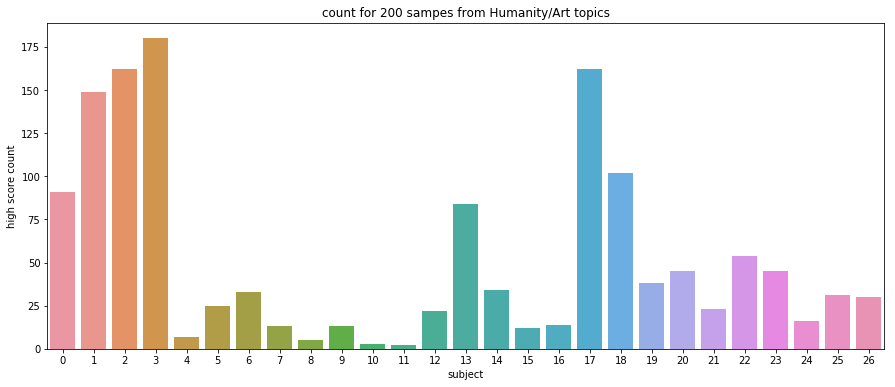

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,6))
plt.title("count for 200 sampes from Humanity/Art topics")
ax = sns.barplot(x="subject", y="high score count", data=df)

In [101]:
#k is times to sample, n is number in one sample, i is subject to sample
def sample_papers(n,k,i):
    samples = []
    for num in range(k):
        sample = []
        sample = bysub[i]['abstract'].sample(n = n, replace=True)
        samples.append(sample) 
    return(samples)

In [128]:
#k is times to sample, n is number in one sample, i is subject to sample
def stdresult(n,k,i):
    results = []
    samples = sample_papers(n, k, i)    
    for num in range(k): 
        result = {}
        sample = samples[num]
        for x in range(27):
            highscore = 0
            for i,val in enumerate(sample):
                if feed_models(x,text_str = val)[1] > 0.6:
                    highscore += 1
            result.update({x: highscore / n})
        results.append(result)
    return(results)
            
    

In [131]:
standarlized = stdresult(200,30,2)

In [133]:
df_std = pd.DataFrame(standarlized)

In [134]:
df_std

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,26
0,0.460,0.745,0.750,0.950,0.015,0.120,0.145,0.075,0.050,0.060,...,0.870,0.485,0.195,0.295,0.145,0.265,0.320,0.100,0.170,0.180
1,0.340,0.770,0.780,0.860,0.005,0.140,0.190,0.095,0.050,0.055,...,0.815,0.470,0.220,0.260,0.165,0.280,0.235,0.100,0.185,0.125
2,0.405,0.790,0.830,0.925,0.015,0.095,0.160,0.060,0.045,0.055,...,0.855,0.535,0.270,0.285,0.150,0.310,0.295,0.060,0.150,0.105
3,0.405,0.795,0.775,0.900,0.030,0.130,0.170,0.040,0.035,0.060,...,0.825,0.410,0.275,0.260,0.125,0.275,0.300,0.070,0.175,0.105
4,0.420,0.780,0.780,0.930,0.025,0.100,0.170,0.045,0.030,0.060,...,0.855,0.470,0.210,0.270,0.130,0.245,0.225,0.085,0.140,0.190
5,0.390,0.725,0.805,0.930,0.025,0.110,0.170,0.075,0.020,0.080,...,0.860,0.575,0.260,0.270,0.160,0.285,0.275,0.125,0.155,0.120
6,0.385,0.740,0.790,0.900,0.020,0.130,0.125,0.095,0.020,0.050,...,0.830,0.465,0.195,0.275,0.115,0.340,0.235,0.085,0.165,0.140
7,0.410,0.800,0.810,0.920,0.020,0.115,0.165,0.085,0.040,0.045,...,0.805,0.540,0.230,0.205,0.150,0.320,0.260,0.050,0.120,0.085
8,0.435,0.765,0.765,0.900,0.035,0.085,0.120,0.080,0.030,0.085,...,0.780,0.475,0.250,0.210,0.125,0.310,0.225,0.090,0.155,0.155
9,0.420,0.800,0.805,0.895,0.030,0.155,0.135,0.075,0.025,0.050,...,0.790,0.495,0.250,0.250,0.155,0.320,0.260,0.100,0.175,0.065


In [187]:
#Don't run, only used if you want highest score returned for every string
from gensim import corpora, models
def LDA_TF_sub_easy(i,text_str = ""):
    bow_corpus_i = [dictionary[i].doc2bow(doc) for doc in processed_docs[i]]
    tfidf_i = models.TfidfModel(bow_corpus_i)
    corpus_tfidf_i = tfidf_i[bow_corpus_i]
    lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf_i, num_topics=10, id2word=dictionary[i], passes=2, workers=4)
    if len(text_str) != 0:
        bow_vector = dictionary[i].doc2bow(preprocess(text_str))
        score = sorted(lda_model_tfidf[bow_vector], key=lambda tup: -1*tup[1])[0]
    return(score[1])

In [ ]:
#Don't run. Only used if you want to store the topic scores and words
from gensim import corpora, models
def LDA_TF_sub_store(i,text_str = ""):
    bow_corpus_i = [dictionary[i].doc2bow(doc) for doc in processed_docs[i]]
    tfidf_i = models.TfidfModel(bow_corpus_i)
    corpus_tfidf_i = tfidf_i[bow_corpus_i]
    lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf_i, num_topics=10, id2word=dictionary[i], passes=2, workers=4)
    topic_score = []
    topic_perc = []
    if len(text_str) != 0:
        bow_vector = dictionary[i].doc2bow(preprocess(text_str))
        for index, score in sorted(lda_model_tfidf[bow_vector], key=lambda tup: -1*tup[1]):
            topic_score.append(score)
            topic_perc.append(lda_model_tfidf.show_topics(formatted = False)[i][1])
    result = list([topic_score, topic_perc])
    return(result)